In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [102]:
df1 = pd.read_csv('to_analyze1.csv')
df34 = pd.read_csv('to_analyze34.csv')
df50 = pd.read_csv('to_analyze50.csv')

In [105]:
df1.columns

Index(['valence', 'acousticness', 'danceability', 'energy', 'explicit',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7',
       'key_8', 'key_9', 'key_10', 'key_11', 'duration_min', 'label'],
      dtype='object')

In [106]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

X = df1.drop('label', axis=1)
y = df1['label']

rf_model = RandomForestRegressor()

rf_model.fit(X, y)

importance_scores = rf_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


KeyboardInterrupt: 

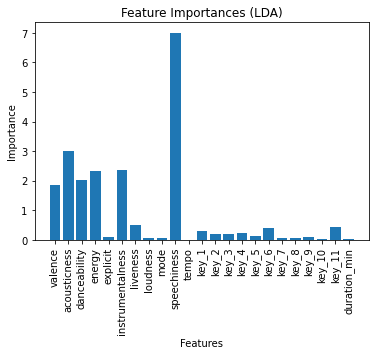

In [107]:
#LDA classifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df1.drop('label', axis=1)
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()

lda.fit(X, y)

importance = np.abs(lda.coef_[0])

feature_names = X.columns

plt.bar(height=importance, x=feature_names)
plt.title("Feature Importances (LDA)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


[9.96829055e-02 3.18417870e-01 7.17172614e-02 1.10286864e-01
 0.00000000e+00 2.04208369e-01 1.43350060e-02 3.84658833e-03
 0.00000000e+00 6.18234332e-01 4.19026828e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.69637621e-03
 1.79513306e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.91787204e-03 2.52188674e-03]


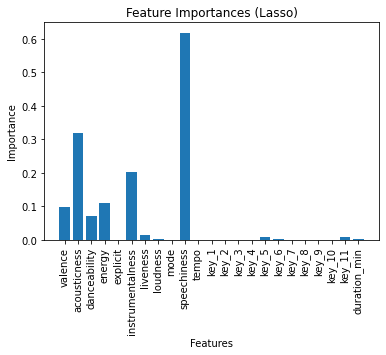

In [108]:
#LassoCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X = df1.drop('label', axis=1)
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = LassoCV()
lasso.fit(X_train, y_train)

importance = np.abs(lasso.coef_)
print(importance)

feature_names = X.columns

plt.bar(height=importance, x=feature_names)
plt.title("Feature Importances (Lasso)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


In [109]:
df34

,valence,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration_min,label
0,0.1450,0.4010,0.731,0.5730,1,0.000052,0.1130,-10.059,0,0.0544,...,1,0,0,0,0,0,0,0,3.418167,1
1,0.7560,0.2210,0.700,0.7220,1,0.000000,0.2720,-3.558,0,0.0369,...,0,0,0,1,0,0,0,0,2.342100,1
2,0.7370,0.0112,0.746,0.7650,0,0.000000,0.0936,-4.410,0,0.0993,...,0,0,1,0,0,0,0,0,3.317567,1
3,0.3570,0.0194,0.935,0.4540,1,0.000000,0.0824,-7.509,1,0.3750,...,0,0,0,0,0,0,0,0,3.125683,1
4,0.6820,0.4680,0.737,0.8020,1,0.000000,0.0931,-4.771,1,0.0878,...,0,0,0,0,0,0,0,0,2.872083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.0696,0.9920,0.224,0.0082,0,0.865000,0.0979,-31.113,1,0.0350,...,0,0,1,0,0,0,0,0,1.690450,0
170649,0.4910,0.1530,0.700,0.1760,1,0.000036,0.1050,-19.316,1,0.9120,...,0,0,0,0,0,0,0,0,1.915000,0
170650,0.4440,0.9770,0.517,0.2540,0,0.000189,0.2740,-9.750,1,0.1200,...,0,0,0,0,0,0,0,0,2.848500,0
170651,0.6120,0.1610,0.699,0.2380,1,0.000000,0.1070,-20.042,0,0.9130,...,0,1,0,0,0,0,0,0,1.762967,0


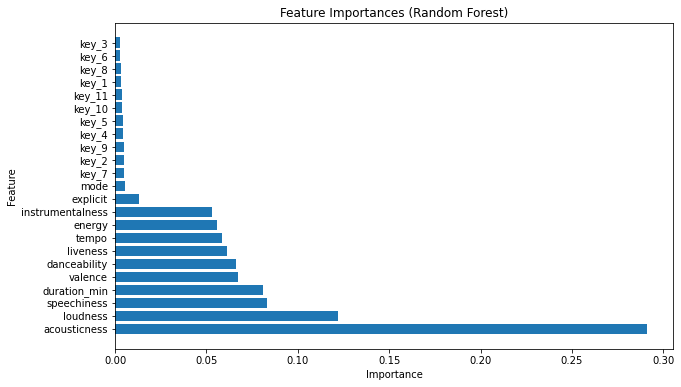

In [110]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

X = df34.drop('label', axis=1)
y = df34['label']

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

importance_scores = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

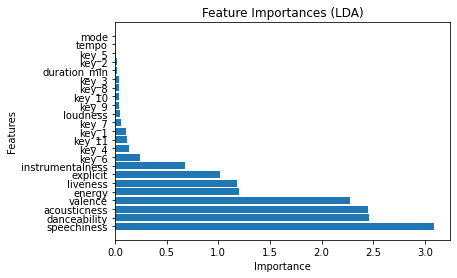

In [132]:
#LDA classifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df34.drop('label', axis=1)
y = df34['label']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

importance = np.abs(lda.coef_[0])
feature_names = X.columns

indices = np.argsort(importance)[::-1]
feature_names_sorted = feature_names[indices]
importance_sorted = importance[indices]

plt.barh(y=feature_names_sorted, width=importance_sorted)
plt.title("Feature Importances (LDA)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()



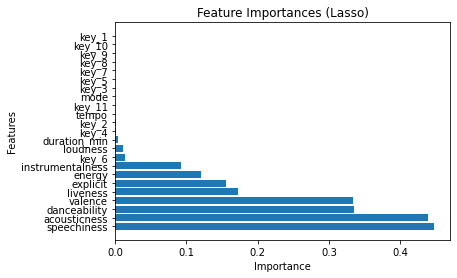

In [134]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X = df34.drop('label', axis=1)
y = df34['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

importance = np.abs(lasso.coef_)
feature_names = X.columns

indices = np.argsort(importance)[::-1]
feature_names_sorted = feature_names[indices]
importance_sorted = importance[indices]

plt.barh(y=feature_names_sorted, width=importance_sorted)
plt.title("Feature Importances (Lasso)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()




In [117]:
df50

,valence,acousticness,danceability,energy,explicit,instrumentalness,liveness,loudness,mode,speechiness,...,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,duration_min,label
0,0.1450,0.4010,0.731,0.5730,1,0.000052,0.1130,-10.059,0,0.0544,...,1,0,0,0,0,0,0,0,3.418167,1
1,0.7560,0.2210,0.700,0.7220,1,0.000000,0.2720,-3.558,0,0.0369,...,0,0,0,1,0,0,0,0,2.342100,1
2,0.7370,0.0112,0.746,0.7650,0,0.000000,0.0936,-4.410,0,0.0993,...,0,0,1,0,0,0,0,0,3.317567,1
3,0.3570,0.0194,0.935,0.4540,1,0.000000,0.0824,-7.509,1,0.3750,...,0,0,0,0,0,0,0,0,3.125683,1
4,0.6820,0.4680,0.737,0.8020,1,0.000000,0.0931,-4.771,1,0.0878,...,0,0,0,0,0,0,0,0,2.872083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.0696,0.9920,0.224,0.0082,0,0.865000,0.0979,-31.113,1,0.0350,...,0,0,1,0,0,0,0,0,1.690450,0
170649,0.4910,0.1530,0.700,0.1760,1,0.000036,0.1050,-19.316,1,0.9120,...,0,0,0,0,0,0,0,0,1.915000,0
170650,0.4440,0.9770,0.517,0.2540,0,0.000189,0.2740,-9.750,1,0.1200,...,0,0,0,0,0,0,0,0,2.848500,0
170651,0.6120,0.1610,0.699,0.2380,1,0.000000,0.1070,-20.042,0,0.9130,...,0,1,0,0,0,0,0,0,1.762967,0


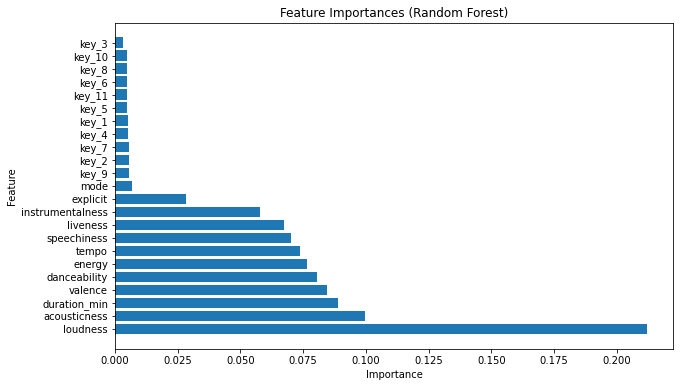

In [120]:
#RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

X = df50.drop('label', axis=1)
y = df50['label']

rf_model = RandomForestRegressor()
rf_model.fit(X, y)

importance_scores = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

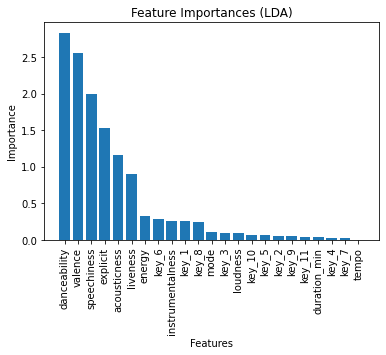

In [118]:
#LDA classifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df50.drop('label', axis=1)
y = df50['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

importance = np.abs(lda.coef_[0])
feature_names = X.columns

indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

plt.bar(height=importance_sorted, x=feature_names_sorted)
plt.title("Feature Importances (LDA)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


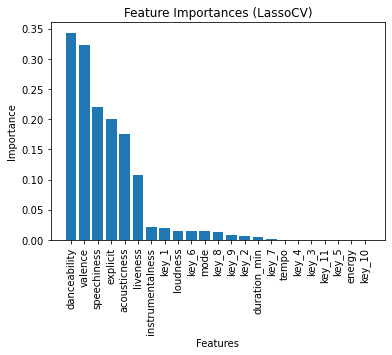

In [121]:
#LassoCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X = df50.drop('label', axis=1)
y = df50['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = LassoCV()
lasso.fit(X_train, y_train)

importance = np.abs(lasso.coef_)
feature_names = X.columns

indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

plt.bar(height=importance_sorted, x=feature_names_sorted)
plt.title("Feature Importances (LassoCV)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()


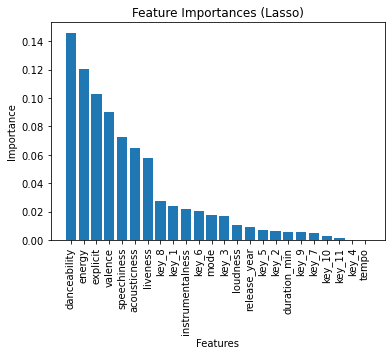

In [96]:
#Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

X = df50.drop('label', axis=1)
y = df50['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

importance = np.abs(lasso.coef_)
feature_names = X.columns

indices = np.argsort(importance)[::-1]
importance_sorted = importance[indices]
feature_names_sorted = feature_names[indices]

plt.bar(height=importance_sorted, x=feature_names_sorted)
plt.title("Feature Importances (Lasso)")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()